# Load the dataset

In [1]:
import numpy as np 
import pandas as pd
df=pd.read_csv('/kaggle/input/comprehensive-indian-online-fraud-dataset/Updated_Inclusive_Indian_Online_Scam_Dataset (1).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7953 entries, 0 to 7952
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     7478 non-null   float64
 1   customer_id        7532 non-null   float64
 2   merchant_id        7481 non-null   float64
 3   amount             7261 non-null   float64
 4   transaction_time   7385 non-null   object 
 5   is_fraudulent      7228 non-null   float64
 6   card_type          7386 non-null   object 
 7   location           7430 non-null   object 
 8   purchase_category  7421 non-null   object 
 9   customer_age       7285 non-null   float64
 10  fraud_type         7455 non-null   object 
dtypes: float64(6), object(5)
memory usage: 683.6+ KB


In [2]:
df.isna().sum()

transaction_id       475
customer_id          421
merchant_id          472
amount               692
transaction_time     568
is_fraudulent        725
card_type            567
location             523
purchase_category    532
customer_age         668
fraud_type           498
dtype: int64

In [3]:
df.dropna(inplace=True)

In [4]:
df.columns

Index(['transaction_id', 'customer_id', 'merchant_id', 'amount',
       'transaction_time', 'is_fraudulent', 'card_type', 'location',
       'purchase_category', 'customer_age', 'fraud_type'],
      dtype='object')

In [5]:
for i in ['card_type', 'location', 'purchase_category']:
    print(df[i].unique())

['MasterCard' 'Visa' 'Rupay']
['Surat' 'Hyderabad' 'Kolkata' 'Mumbai' 'Delhi' 'Chennai' 'Jaipur'
 'Ahmedabad' 'Bangalore' 'Pune']
['POS' 'Digital']


In [6]:
df.head()

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,fraud_type
1,2.0,447448.0,2046.0,2222.928,03/30/2024 16:18,0.0,MasterCard,Surat,POS,62.0,Malware
2,3.0,975001.0,2067.0,7509.832,03/07/2024 18:27,0.0,MasterCard,Hyderabad,POS,24.0,Malware
8,9.0,401388.0,2035.0,3904.200,01/09/2024 00:43,0.0,Visa,Kolkata,Digital,37.0,Malware
11,12.0,620576.0,2042.0,8069.630,12/17/2023 07:43,0.0,Rupay,Hyderabad,POS,33.0,Malware
14,15.0,679113.0,2019.0,11429.748,09/10/2023 23:01,1.0,Visa,Mumbai,Digital,24.0,Payment card fraud


<Axes: xlabel='is_fraudulent', ylabel='count'>

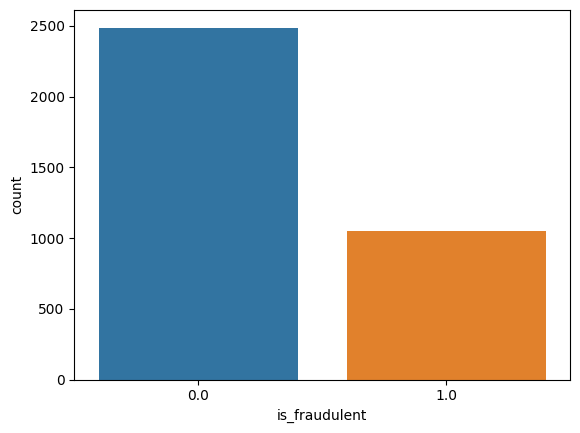

In [7]:
import seaborn as sns
sns.countplot(df,x=df['is_fraudulent'])

<Axes: xlabel='fraud_type', ylabel='count'>

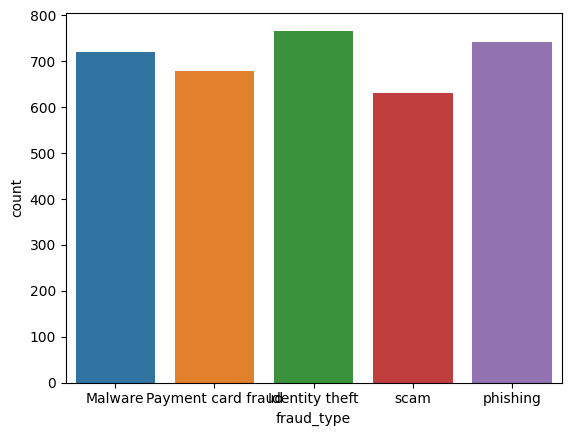

In [8]:
sns.countplot(df,x=df['fraud_type'])

Since there is no value as `NA` or `-` in the fraud_type column but value `0.0` exists in `is_fradulent` column,we assume that the fraud type gives the most probable type of fraud

In [9]:
df.columns

Index(['transaction_id', 'customer_id', 'merchant_id', 'amount',
       'transaction_time', 'is_fraudulent', 'card_type', 'location',
       'purchase_category', 'customer_age', 'fraud_type'],
      dtype='object')

# Feature Engineering

In [10]:
df['transaction_time']=pd.to_datetime(df['transaction_time'])

In [11]:
df['time_of_day']=[a.hour for a in df['transaction_time']]

In [12]:
df['time_of_day'] = pd.cut(df['time_of_day'],
                          bins=[-1, 6, 12, 18, 24],
                          labels=['night', 'morning', 'afternoon', 'evening'])

In [13]:
df['time_of_day']

1       afternoon
2       afternoon
8           night
11        morning
14        evening
          ...    
7941        night
7943      morning
7946      morning
7950      evening
7951        night
Name: time_of_day, Length: 3539, dtype: category
Categories (4, object): ['night' < 'morning' < 'afternoon' < 'evening']

/tmp/ipykernel_17/3656278072.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  harmful_counts = df.groupby('time_of_day')['is_fraudulent'].sum()


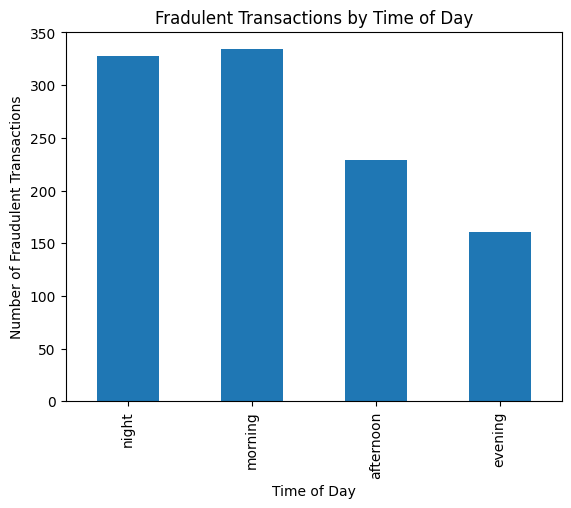

In [14]:
import matplotlib.pyplot as plt
harmful_counts = df.groupby('time_of_day')['is_fraudulent'].sum()
harmful_counts.plot(kind='bar')
plt.xlabel('Time of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.title('Fradulent Transactions by Time of Day')
plt.show()

# Preprocess the dataset

In [15]:
#Ignoring the PII such as `transaction_id`,`customer_id`,`merchant_id`
features=['amount','card_type','location','purchase_category','customer_age','time_of_day']
d=['is_fraudulent','fraud_type']
l={}
from sklearn.preprocessing import LabelEncoder
for i in features:
    if df[i].dtype=='object' or df[i].dtype=='category':
        le=LabelEncoder()
        df[i]=le.fit_transform(df[i])
        l[i]=le
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3539 entries, 1 to 7951
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   transaction_id     3539 non-null   float64       
 1   customer_id        3539 non-null   float64       
 2   merchant_id        3539 non-null   float64       
 3   amount             3539 non-null   float64       
 4   transaction_time   3539 non-null   datetime64[ns]
 5   is_fraudulent      3539 non-null   float64       
 6   card_type          3539 non-null   int64         
 7   location           3539 non-null   int64         
 8   purchase_category  3539 non-null   int64         
 9   customer_age       3539 non-null   float64       
 10  fraud_type         3539 non-null   object        
 11  time_of_day        3539 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(4), object(1)
memory usage: 359.4+ KB


In [16]:
fraud_type=LabelEncoder()
df['fraud_type']=fraud_type.fit_transform(df['fraud_type'])

In [17]:
df.head()

,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,fraud_type,time_of_day
1,2.0,447448.0,2046.0,2222.928,2024-03-30 16:18:00,0.0,0,9,1,62.0,1,0
2,3.0,975001.0,2067.0,7509.832,2024-03-07 18:27:00,0.0,0,4,1,24.0,1,0
8,9.0,401388.0,2035.0,3904.200,2024-01-09 00:43:00,0.0,2,6,0,37.0,1,3
11,12.0,620576.0,2042.0,8069.630,2023-12-17 07:43:00,0.0,1,4,1,33.0,1,2
14,15.0,679113.0,2019.0,11429.748,2023-09-10 23:01:00,1.0,2,7,0,24.0,2,1


# Is Fraud?

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [19]:
X = df[features]
y = df['is_fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Confusion Matrix for Logistic Regression:
[[492   0]
 [216   0]]

Confusion Matrix for Decision Tree:
[[492   0]
 [  0 216]]

Confusion Matrix for Random Forest:
[[492   0]
 [  0 216]]

Confusion Matrix for Gradient Boosting:
[[485   7]
 [112 104]]

Confusion Matrix for SVM:
[[492   0]
 [216   0]]


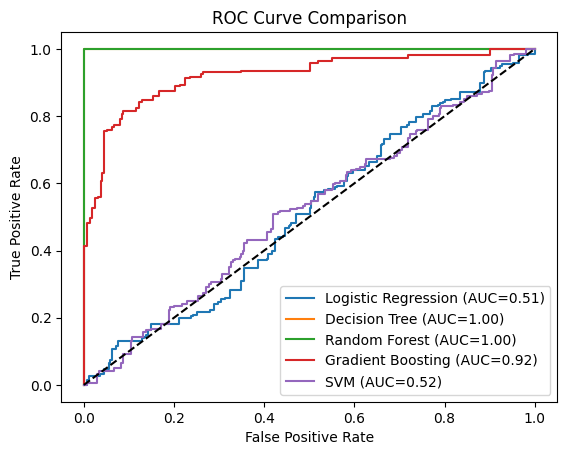

In [20]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)  # For ROC curve calculation
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {model_name}:\n{cm}")

    # ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc:.2f})")
    
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random guess)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

We can see `Decision Tree` & `Random Forest` has achieved a ROC of 1 on test set,capturing all complex features and providing 100% accurate results

# Saving the Model

In [21]:
import pickle
for i in l.keys():
    with open(f'{i}.pkl', 'wb') as f:
        pickle.dump(l[i], f)

with open('is_fraud.pkl', 'wb') as f:
    pickle.dump(models['Decision Tree'], f)

# Advanced Analysis
Fraud Type 

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [23]:
X = df[features]  
y = df['fraud_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
models = {
    "Logistic Regression": LogisticRegression(multi_class='multinomial',max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Classification Report
    report = classification_report(y_test, y_pred)
    print(f"\nClassification Report for {model_name}:\n{report}")

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    # Confusion Matrix (optional)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix for {model_name}:\n{cm}")


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.24      0.32      0.27       160
           1       0.24      0.16      0.19       141
           2       0.25      0.19      0.21       140
           3       0.22      0.45      0.30       140
           4       0.41      0.06      0.10       127

    accuracy                           0.24       708
   macro avg       0.27      0.23      0.21       708
weighted avg       0.27      0.24      0.22       708

Accuracy: 0.24

Confusion Matrix for Logistic Regression:
[[51 15 31 58  5]
 [53 22 12 53  1]
 [42 11 26 61  0]
 [36 21 16 63  4]
 [29 24 20 47  7]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       160
           1       0.99      1.00      1.00       141
           2       1.00      1.00      1.00       140
           3       1.00      0.99      1.00       140
 

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


We can see Decision Tree & Random Forest has achieved accuracy of 100% on test set

In [25]:
with open('fraud_type_le.pkl', 'wb') as f:
    pickle.dump(fraud_type, f)
with open('fraud_type.pkl', 'wb') as f:
    pickle.dump(models['Decision Tree'], f)

# Saving the model for future Predictions